In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
Term = pd.read_csv('/content/Dataset_Medicine.csv')

In [5]:
Term.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Visualisation of Eachcolumns dataset

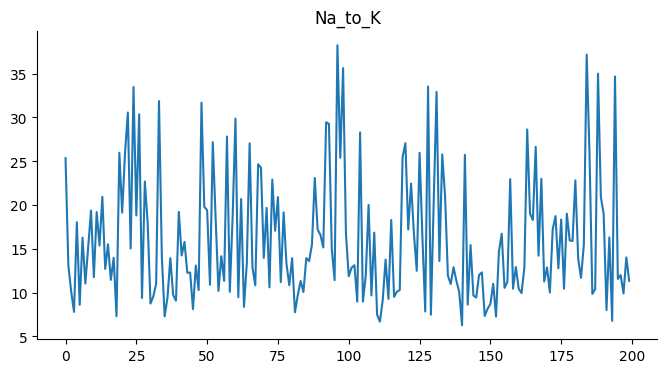

In [6]:
#Potassium to
from matplotlib import pyplot as plt
Term['Na_to_K'].plot(kind='line', figsize=(8, 4), title='Na_to_K')
plt.gca().spines[['top', 'right']].set_visible(False)

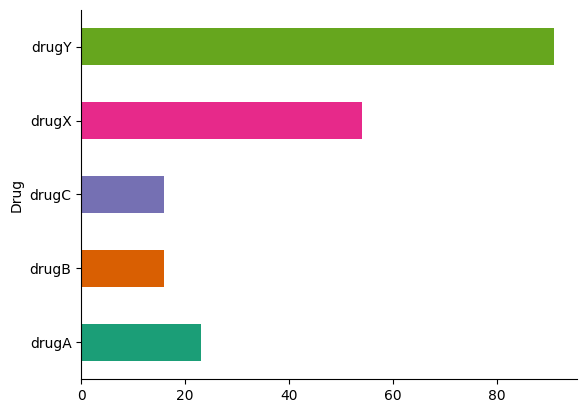

In [7]:
#Drug Count:
from matplotlib import pyplot as plt
import seaborn as sns
Term.groupby('Drug').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

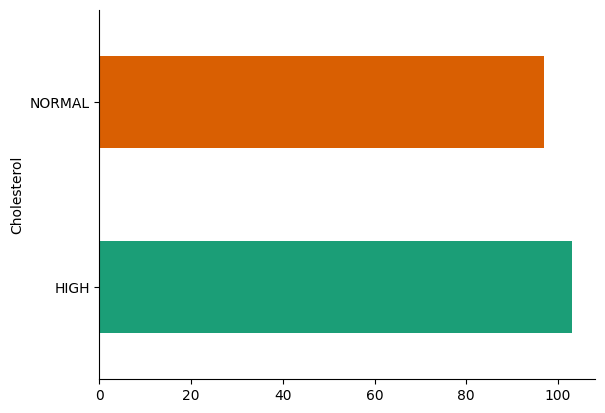

In [8]:
#Visualisation of Cholestrol:
from matplotlib import pyplot as plt
import seaborn as sns
Term.groupby('Cholesterol').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

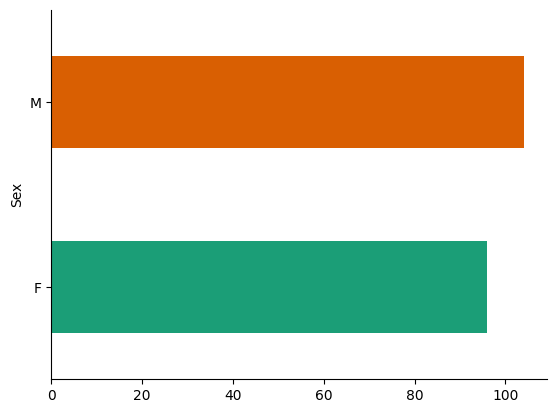

In [9]:
#Gender Visualisation:
from matplotlib import pyplot as plt
import seaborn as sns
Term.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

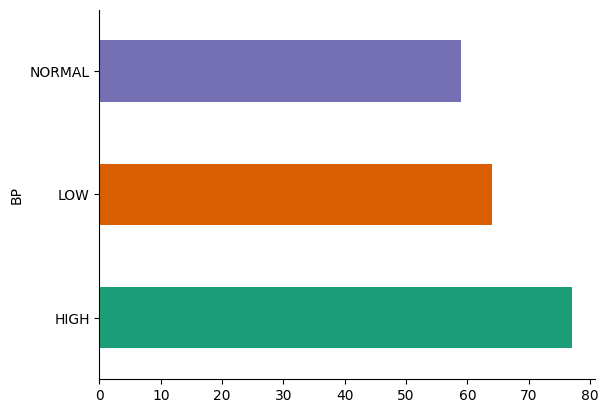

In [10]:
#BP visualisation
from matplotlib import pyplot as plt
import seaborn as sns
Term.groupby('BP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
Term.count()

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64

In [12]:
label_encoder = LabelEncoder()
Term['Sex'] = label_encoder.fit_transform(Term['Sex'])
Term['BP'] = label_encoder.fit_transform(Term['BP'])
Term['Cholesterol'] = label_encoder.fit_transform(Term['Cholesterol'])
Term['Drug'] = label_encoder.fit_transform(Term['Drug'])

In [13]:
Term.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [14]:
# Separating features and target variable
X = Term.drop(columns=['Drug'])  # Features
y = Term['Drug']  # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model_pred = RandomForestClassifier(n_estimators=100, random_state=42)
model_pred.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model_pred.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForestClassifier:", accuracy)

Accuracy of RandomForestClassifier: 1.0


In [19]:
Diff_classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each classifier
for name, model_pred in Diff_classifiers.items():
  model_pred.fit(X_train, y_train)
  y_pred = model_pred.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy of {name}: {accuracy}")

Accuracy of Decision Tree: 1.0
Accuracy of K Nearest Neighbors: 0.7
Accuracy of Support Vector Machine: 0.625


In [20]:
Diff_classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True)  # Set probability=True for SVC to enable probability estimates
}


Accuracy of Decision Tree: 1.0
Accuracy of K Nearest Neighbors: 0.7
Accuracy of Support Vector Machine: 0.625


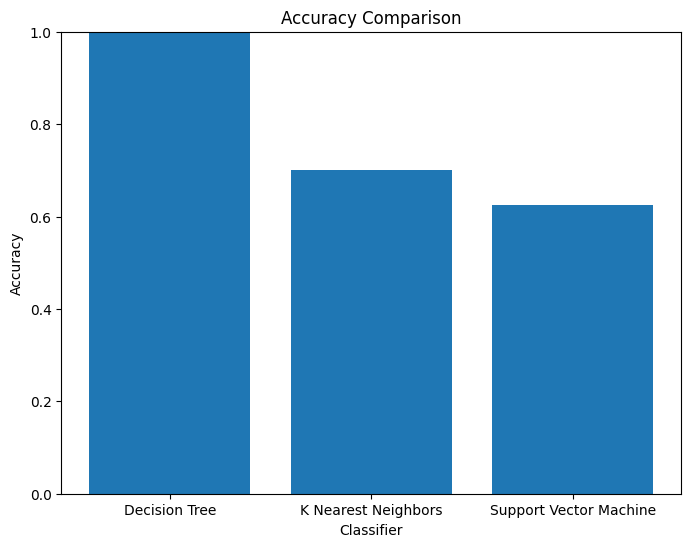

In [21]:
accuracy_scores = []

# Train and evaluate each classifier
for name, model in Diff_classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy of {name}: {accuracy}")

# Plot accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(Diff_classifiers.keys(), accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [25]:
from sklearn.metrics import roc_curve, precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [26]:
roc_auc_scores = []
precision_scores = []

In [40]:
for name, model in Diff_classifiers.items():
    # Convert the target variable to binary format
    y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

    # Fit One-vs-Rest classifier and predict probabilities
    model_pred = OneVsRestClassifier(model)
    model_pred.fit(X_train, y_train_bin)
    y_score = model_pred.predict_proba(X_test)

    # Compute ROC curve and ROC AUC score
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(Diff_classifiers)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Computing the micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_score, average="micro")

In [33]:
y_pred = model_pred.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')

In [37]:
# Store ROC AUC score and precision score
roc_auc_scores.append(roc_auc["micro"])
precision_scores.append(precision)

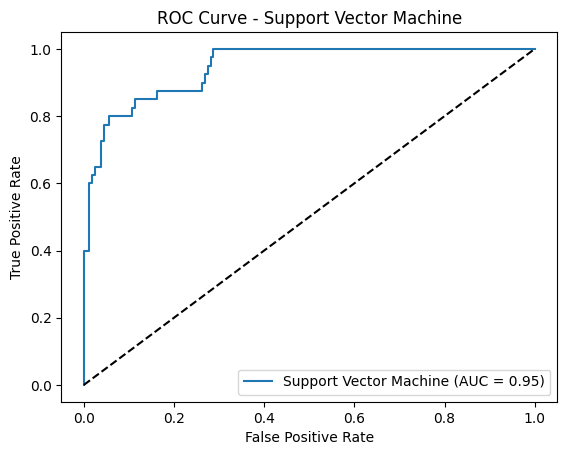

In [41]:
# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {name}')
plt.legend(loc="lower right")
plt.show()


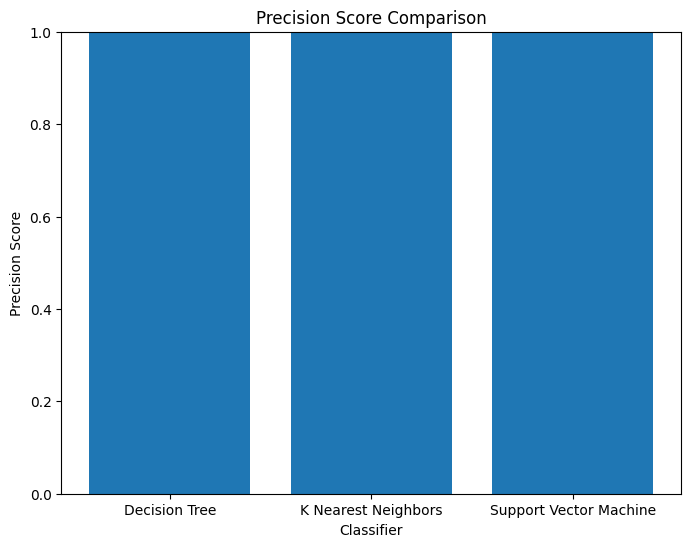

In [36]:
# Compare Precision scores
plt.figure(figsize=(8, 6))
plt.bar(Diff_classifiers.keys(), precision_scores)
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Score Comparison')
plt.ylim(0, 1)
plt.show()